In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
book_movie = pd.read_csv('book_movie_database.csv')

In [46]:
book_movie.shape

(692, 10)

In [47]:
book_movie.dtypes

book_title               object
book_rating             float64
book_number_ratings       int64
book_year_published     float64
popularity              float64
release_date             object
movie_runtime             int64
movie_rating            float64
movie_number_ratings      int64
genres                   object
dtype: object

In [48]:
#Getting genres as columns to expand the dataframe.

g = book_movie['genres']
from ast import literal_eval
g = g.apply(literal_eval)

In [49]:
g.iloc[200:240]

200    [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...
201    [{'id': 9648, 'name': 'Mystery'}, {'id': 18, '...
202    [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...
203    [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...
204    [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...
205    [{'id': 12, 'name': 'Adventure'}, {'id': 10751...
206    [{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...
207    [{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...
208    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
209    [{'id': 10749, 'name': 'Romance'}, {'id': 18, ...
210                       [{'id': 35, 'name': 'Comedy'}]
211    [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...
212    [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...
213    [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...
214    [{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...
215                        [{'id': 18, 'name': 'Drama'}]
216    [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...
217                        [{'i

In [66]:
genre1 = []
for i, name in enumerate(d[0]['name'] for d in g): 
    genre1.append(name)

In [68]:
book_movie['main_genre'] = genre1

In [74]:
book_movie['main_genre'].value_counts()

Drama              303
Comedy              76
Adventure           67
Crime               34
Action              31
Fantasy             25
Horror              24
Romance             24
Family              24
Animation           21
Thriller            15
Science Fiction     14
TV Movie            12
Mystery             11
Western              4
History              3
War                  2
Music                1
Documentary          1
Name: main_genre, dtype: int64

In [76]:
pd.get_dummies(book_movie['main_genre'])

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [77]:
book_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 11 columns):
book_title              692 non-null object
book_rating             692 non-null float64
book_number_ratings     692 non-null int64
book_year_published     691 non-null float64
popularity              692 non-null float64
release_date            692 non-null object
movie_runtime           692 non-null int64
movie_rating            692 non-null float64
movie_number_ratings    692 non-null int64
genres                  692 non-null object
main_genre              692 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 59.5+ KB


To begin, visualize the data:

In [66]:
book_movie.corr()

,book_rating,book_number_ratings,book_year_published,popularity,movie_runtime,movie_rating,movie_number_ratings
book_rating,1.000000,0.237532,0.024557,0.082068,0.001495,0.255455,0.200784
book_number_ratings,0.237532,1.000000,-0.063259,0.183304,0.119640,0.111955,0.341852
book_year_published,0.024557,-0.063259,1.000000,0.249950,-0.099432,0.028697,0.212706
popularity,0.082068,0.183304,0.249950,1.000000,0.093390,0.258327,0.685483
movie_runtime,0.001495,0.119640,-0.099432,0.093390,1.000000,0.156575,0.126660
movie_rating,0.255455,0.111955,0.028697,0.258327,0.156575,1.000000,0.310184
movie_number_ratings,0.200784,0.341852,0.212706,0.685483,0.126660,0.310184,1.000000


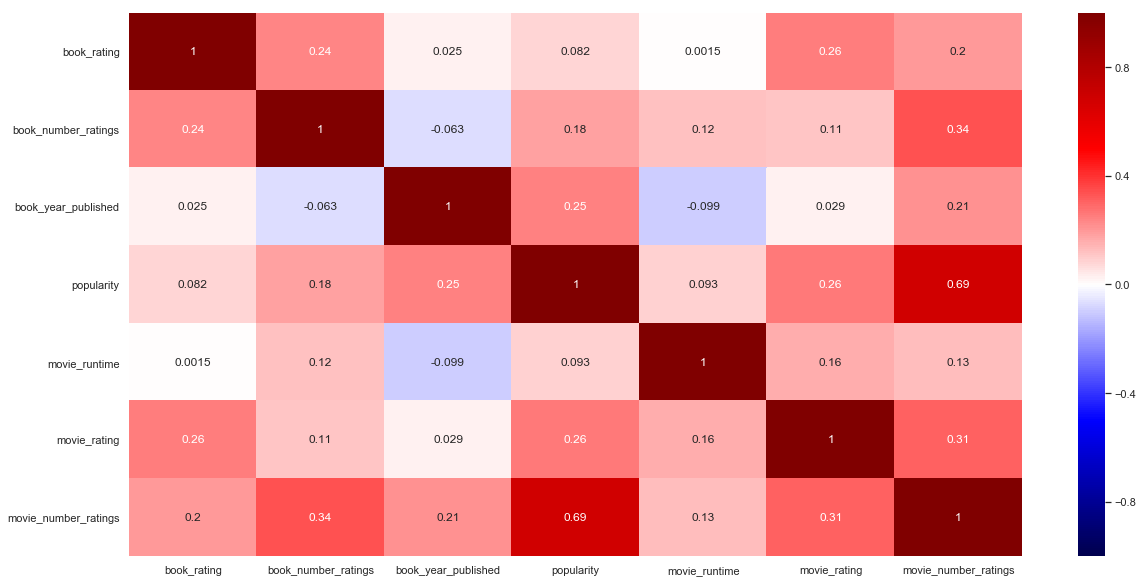

In [69]:
sns.set(font_scale=1) 
plt.figure(figsize=(20,10))
sns.heatmap(book_movie.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


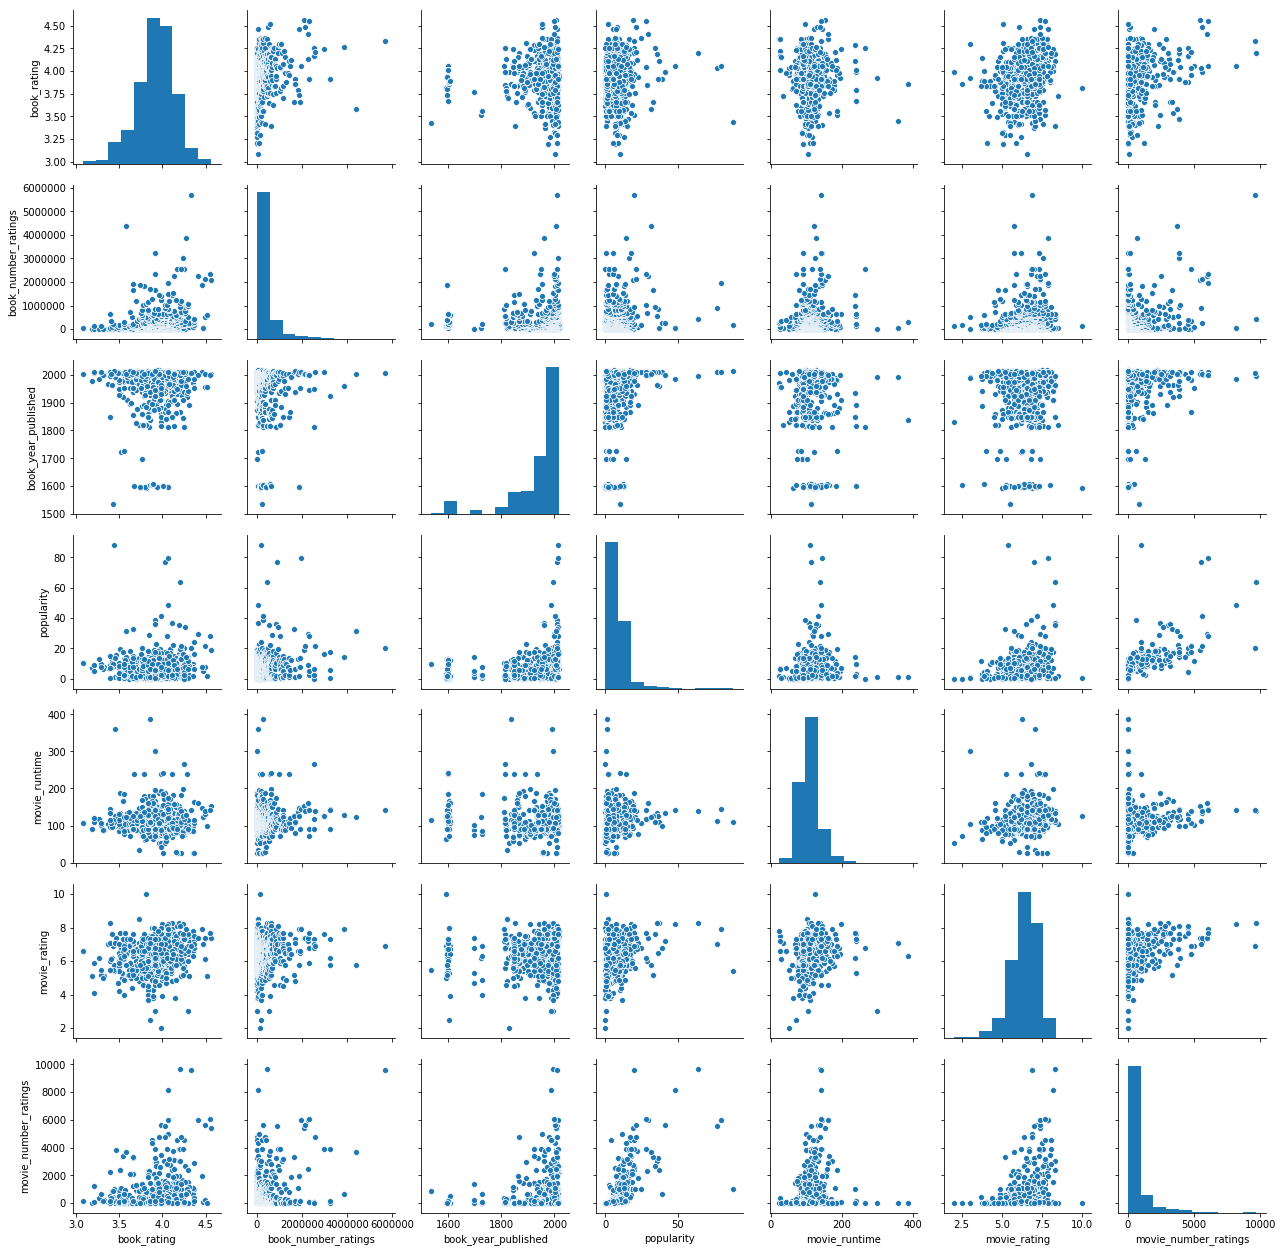

In [11]:
sns.pairplot(book_movie); #use log transformation for all the skewed features, using scaling for large-scale feature, standard scaler prefers normally distributed features.

In [71]:
# Create our feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('movie_rating ~ book_rating + book_number_ratings + popularity + movie_runtime + movie_number_ratings', data=book_movie, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           movie_rating   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     25.67
Date:                Thu, 11 Apr 2019   Prob (F-statistic):           8.71e-24
Time:                        15:21:29   Log-Likelihood:                -851.36
No. Observations:                 692   AIC:                             1715.
Df Residuals:                     686   BIC:                             1742.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.4033      0.595      4.039      0.000       1.235       3.572
book_rating              0.8857      0.149      5.959      0.000       0.594       1.177
book_number_ratings  -6.369e-08    6.1e-08     -1.045      0.296   -1.83e-07     5.6e-08
popularity               0.0113      0.005      2.142      0.033       0.001       0.022
movie_runtime            0.0036      0.001      3.577      0.000       0.002       0.006
movie_number_ratings     0.0001   3.97e-05      3.778      0.000     7.2e-05       0.000
==============================================================================
Omnibus:                       95.792   Durbin-Watson:                   1.442
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.437
Skew:                          -0.709   Prob(JB):                     3.41e-56
Kurtosis:                       5.617   Cond. No.                     1.28e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# Define the model
lm1 = smf.ols('movie_rating ~ book_rating + book_number_ratings + popularity + movie_runtime + movie_number_ratings', data=book_movie)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           movie_rating   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     25.38
Date:                Thu, 11 Apr 2019   Prob (F-statistic):           1.57e-23
Time:                        14:51:31   Log-Likelihood:                -851.96
No. Observations:                 692   AIC:                             1716.
Df Residuals:                     686   BIC:                             1743.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.4491      0.593      4.129      0.000       1.285       3.614
book_rating              0.8784      0.148      5.925      0.000       0.587       1.170
book_number_ratings  -6.749e-08   6.09e-08     -1.108      0.268   -1.87e-07    5.21e-08
popularity               0.0080      0.004      1.852      0.064      -0.000       0.016
movie_runtime            0.0036      0.001      3.583      0.000       0.002       0.006
movie_number_ratings     0.0002   3.77e-05      4.328      0.000    8.91e-05       0.000
==============================================================================
Omnibus:                       96.834   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.438
Skew:                          -0.716   Prob(JB):                     7.60e-57
Kurtosis:                       5.629   Cond. No.                     1.27e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residuals')

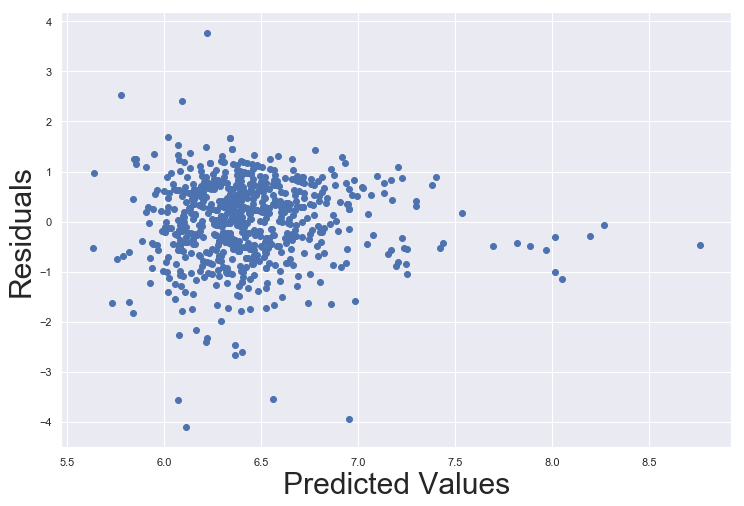

In [72]:
plt.figure(figsize=(12,8))
plt.scatter(fit.predict(), fit.resid);
plt.xlabel('Predicted Values', size = 30)
plt.ylabel('Residuals', size = 30)

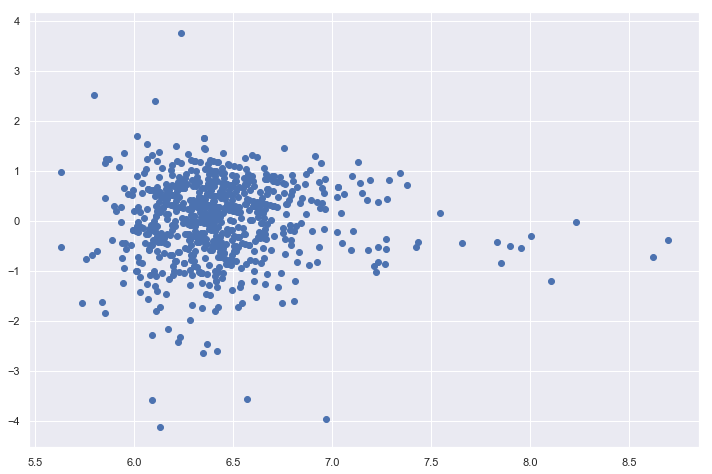

In [80]:
plt.figure(figsize=(12,8))
plt.scatter(fit1.predict(), fit1.resid);

In [121]:
columns = ['book_rating', 'book_number_ratings','popularity','movie_runtime','movie_number_ratings']

In [122]:
X = columns
y = book_movie['movie_rating']

In [123]:
book_movie.to_pickle('book_movie.pkl')